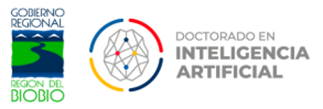

##Investigación Dirigida
Profesor José Luis Carrasco Sáez

Sheny San Martín Quiroga

#Introducción

En este trabajo se estudiará el uso diferentes algoritmos de Machine Learning y Deep Learning aplicados sobre el conjunto de datos extraído de un cuestionario respondido por docentes de 7° Básico a 4° Medio.

##Conjunto de Datos:

El instrumento de recolección de datos fue un cuestionario estructurado elaborado en un formulario de Google, compuesto por 36 preguntas, organizadas en cuatro dimensiones:

Dimensión 1: Datos sociodemográficos

Dimensión 2: Conocimiento sobre retroalimentación

Dimensión 3: Prácticas de retroalimentación

Dimensión 4: Percepción de la institucionalidad

El cuestionario combinó ítems de tipo cerrado, con escala ordinal tipo Likert, y preguntas de selección múltiple para captar tanto la frecuencia como la intensidad de las prácticas docentes.


#**EDA**

Lectura de los datos.

Se renombran las columnas (preguntas) a formato variable.


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

# Cargar datos
df = pd.read_excel('/content/drive/MyDrive/Respuestas_Cuestionario_Retroalimentación.xlsx')

# Renombrar columnas a formato variable
column_mapping = {
    'Marca temporal': 'marca_temporal',
    'Acepto participar:': 'acepto_participar',
    '1. Género': '1_genero',
    '2. Edad': '2_edad',
    '3. Nombre de su comunidad educativa': '3_nombre_comunidad_educativa',
    '4. RBD del establecimiento al que pertenece': '4_rbd_establecimiento',
    '5. Tipo de establecimiento': '5_tipo_establecimiento',
    '6. Tramo en el que se encuentra en la Carrera Docente': '6_tramo_carrera_docente',
    '7. Región donde trabaja': '7_region_trabajo',
    '8. Nivel(es) educativos que imparte (puede marcar más de una opción)': '8_niveles_educativos',
    '9. Modalidad de educación que imparte su establecimiento': '9_modalidad_educacion',
    '10. Asignatura principal que imparte (en la que tiene más horas pedagógicas)': '10_asignatura_principal',
    '11. Años de experiencia docente': '11_años_experiencia_docente',
    '12. Cantidad de horas pedagógicas semanales': '12_horas_pedagogicas_semanales',
    '13. Número promedio de estudiantes por curso': '13_promedio_estudiantes_curso',
    '14. Carrera de origen: Pedagogía u otra': '14_carrera_origen',
    '15. ¿En su labor pedagógica, considera usted que realiza retroalimentación?': '15_realiza_retroalimentacion',
    '16. ¿Cuál es su nivel de formación en retroalimentación para el aula?': '16_nivel_formacion_retroalimentacion',
    '17. ¿Cuál de las siguientes opciones resume de mejor manera el concepto de retroalimentación? (puede marcar más de una opción)': '17_concepto_retroalimentacion',
    '18. ¿Qué relevancia le otorga a la retroalimentación en el proceso de enseñanza- aprendizaje?': '18_relevancia_retroalimentacion',
    '19. ¿En qué momento (s) entrega retroalimentación a sus estudiantes? (puede marcar más de una opción)': '19_momento_entrega_retroalimentacion',
    '20. ¿Qué técnica (s) de retroalimentación utiliza? (puede marcar más de una opción)': '20_tecnicas_retroalimentacion',
    '21. ¿Cuánto tiempo por clase dedica a entregar retroalimentación?': '21_tiempo_retroalimentacion_clase',
    '22. ¿Debe ser la retroalimentación vista como un evento aislado o como un componente integral y continuo del aprendizaje?': '22_retroalimentacion_evento_continuo',
    '23. Cuando proporciona retroalimentación, ¿Qué enfoque (s) utiliza? (puede marcar más de una opción)': '23_enfoques_retroalimentacion',
    '24. ¿Considera que la retroalimentación que entrega incide en sus propias prácticas pedagógicas y en la planificación de sus clases?': '24_incidencia_retroalimentacion_practicas',
    '25. ¿Con qué frecuencia utiliza tecnologías para retroalimentar a sus estudiantes?': '25_frecuencia_tecnologias_retroalimentacion',
    '26. ¿Qué herramientas tecnológicas utiliza para retroalimentar a sus estudiantes? (puede marcar más de una opción)': '26_herramientas_tecnologicas',
    '27. Si lo estima conveniente, comente las ventajas de utilizar tecnologías para retroalimentar al estudiante (respuesta abierta)': '27_ventajas_tecnologias_retroalimentacion',
    '28. Si lo estima conveniente, comente las dificultades encontradas al usar tecnologías para retroalimentar al estudiante': '28_dificultades_tecnologias_retroalimentacion',
    '29. ¿Considera que colocar en práctica la retroalimentación genera un impacto positivo en el aprendizaje de sus estudiantes?': '29_impacto_positivo_retroalimentacion',
    '30. ¿Considera que su comunidad educativa fomenta una cultura de retroalimentación en el aula?': '30_comunidad_educativa_fomenta_retroalimentacion',
    '31. ¿Considera que la retroalimentación en el aula está integrada en su comunidad educativa de manera formal?': '31_retroalimentacion_integrada_formal',
    '32. ¿Con qué frecuencia observa mejoras en el aprendizaje de sus estudiantes tras retroalimentar?': '32_frecuencia_mejoras_aprendizaje',
    '33. ¿En su comunidad educativa tiene acceso a capacitaciones en retroalimentación de aprendizajes en el aula?': '33_acceso_capacitaciones_retroalimentacion',
    '34. ¿Cómo evalúa el apoyo (por ejemplo: pedagógico, herramientas tecnológicas, capacitación) que recibe de su institución educativa para retroalimentar a sus estudiantes?': '34_evaluacion_apoyo_institucion',
    '35. ¿En su comunidad educativa, con que frecuencia le solicitan entregar reportes acerca de la retroalimentación que usted hace con sus estudiantes?': '35_frecuencia_reportes_retroalimentacion',
    '36. ¿Cuáles son los principales desafíos que enfrenta al implementar una retroalimentación efectiva en su aula? (puede marcar más de una opción)': '36_desafios_retroalimentacion_efectiva',
}

# Crea una lista de los nuevos nombres de columna aplicando el mapeo
# Si un nombre original de columna no está en el mapeo, se mantiene su nombre original.
new_columns = [column_mapping.get(col, col) for col in df.columns]
df.columns = new_columns

# Eliminar filas donde 'acepto_participar' es 'No'
df = df[df['acepto_participar'] != 'No']

# Mostrar información básica
print("\nINSPECCIÓN INICIAL DEL CONJUNTO DE DATOS:")
print("\nColumnas (primeras 10):", df.columns.tolist()[:10]) # Muestra las primeras 10 para verificar
print("\nINFORMACIÓN DEL DATAFRAME:")
print(df.info())
print("\nVALORES NULOS ORDENADOS:")
valores_nulos = df.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]
valores_nulos_ordenados = valores_nulos.sort_values(ascending=False)
print(valores_nulos_ordenados)

Mounted at /content/drive

INSPECCIÓN INICIAL DEL CONJUNTO DE DATOS:

Columnas (primeras 10): ['marca_temporal', 'acepto_participar', '1_genero', '2_edad', '3_nombre_comunidad_educativa', '4_rbd_establecimiento', '5_tipo_establecimiento', '6_tramo_carrera_docente', '7_region_trabajo', '8_niveles_educativos']

INFORMACIÓN DEL DATAFRAME:
<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 272
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   marca_temporal                                    260 non-null    object 
 1   acepto_participar                                 260 non-null    object 
 2   1_genero                                          260 non-null    object 
 3   2_edad                                            260 non-null    float64
 4   3_nombre_comunidad_educativa                      260 non-null    object 
 5   4_rb

## Columnas Numéricas

Con la descripción de las columnas numéricas se puede apreciar que el promedio de edad fue de 41 años y un promedio de carga horaria de 33 horas semanales.

In [3]:
print("\nDESCRIPCIÓN ESTADÍSTICA:")
print(df.describe())


DESCRIPCIÓN ESTADÍSTICA:
           2_edad  4_rbd_establecimiento  12_horas_pedagogicas_semanales
count  260.000000             260.000000                      260.000000
mean    41.623077           12046.050000                       33.948077
std     10.630157           23792.940672                       10.208927
min     23.000000              32.000000                        1.000000
25%     34.000000            4687.000000                       30.000000
50%     39.000000            4982.000000                       36.000000
75%     47.000000           12008.000000                       43.000000
max     72.000000          182370.000000                       47.000000


###Gráficos para visualizar la distribución de cada variable numérica individualmente.

In [4]:
# Columnas numéricas
numerical_cols = ['2_edad', '4_rbd_establecimiento', '12_horas_pedagogicas_semanales']

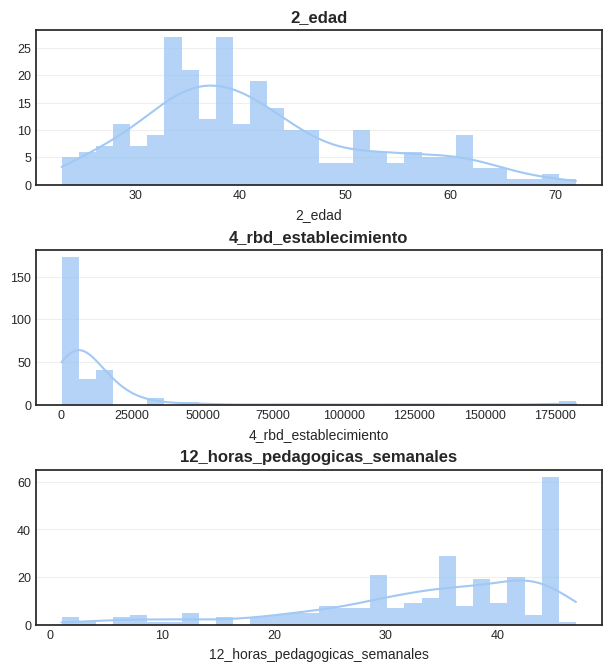

In [5]:
plt.style.use('seaborn-v0_8-white')
sns.set_palette("pastel")

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(6, 2.2 * len(numerical_cols)), constrained_layout=True)
if len(numerical_cols) == 1: axes = [axes]

for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], kde=True, ax=ax, bins=30, alpha=0.8, linewidth=0)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.show()

## Columnas Categóricas Ordinales



In [6]:
# Lista de columnas categóricas ordinales
ordinal_cols = [
    '16_nivel_formacion_retroalimentacion',
    '18_relevancia_retroalimentacion',
    '21_tiempo_retroalimentacion_clase',
    '22_retroalimentacion_evento_continuo',
    '24_incidencia_retroalimentacion_practicas',
    '25_frecuencia_tecnologias_retroalimentacion',
    '29_impacto_positivo_retroalimentacion',
    '30_comunidad_educativa_fomenta_retroalimentacion',
    '31_retroalimentacion_integrada_formal',
    '32_frecuencia_mejoras_aprendizaje'
    '33_acceso_capacitaciones_retroalimentacion',
    '34_evaluacion_apoyo_institucion',
    '35_frecuencia_reportes_retroalimentacion'
]

# Examina los valores únicos para las columnas ordinales
ordinal_scales = {}
for col in ordinal_cols:
    if col in df.columns:
        ordinal_scales[col] = df[col].unique()

for col, scale in ordinal_scales.items():
    print(f"Column: {col}")
    print(f"Scale: {scale}\n")

Column: 16_nivel_formacion_retroalimentacion
Scale: ['He recibido formación especializada (diplomado, posgrado)'
 'He aprendido de forma autódidacta o informal'
 'He participado en talleres o cursos breves'
 'Lo conozco, pero no he recibido formación' 'No conozco el concepto']

Column: 18_relevancia_retroalimentacion
Scale: ['Muy relevante' 'Medianamente relevante' 'Extremadamente relevante'
 'Poco relevante' 'Nada relevante']

Column: 21_tiempo_retroalimentacion_clase
Scale: ['15 - 30 min' 'Menos de 15 min' '30 min - 1 h' '1 - 2 h']

Column: 22_retroalimentacion_evento_continuo
Scale: ['Un componente integral y continuo durante todo el proceso de aprendizaje'
 'Principalmente al final del semestre/trimestre, con algunas instancias intermedias'
 'No lo tengo claro']

Column: 24_incidencia_retroalimentacion_practicas
Scale: ['Siempre, me ayuda a ajustar y mejorar mi enseñanza'
 'Frecuentemente, pero no siempre de forma explícita'
 'A veces, si los resultados son muy evidentes' 'No lo te

###Gráficos para visualizar la distribución de cada variable categórica ordinal individualmente.

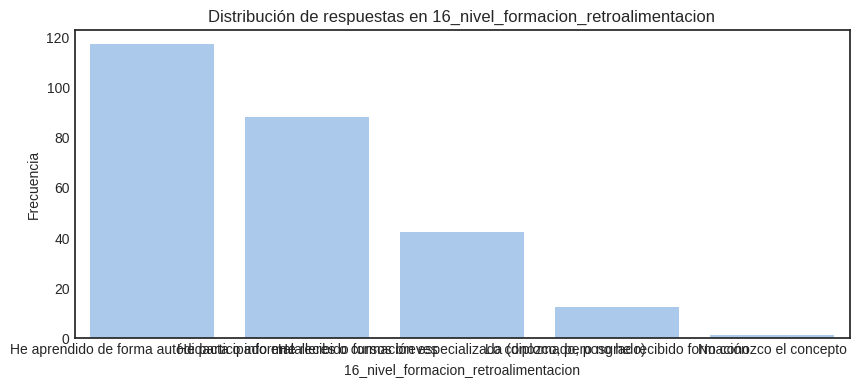

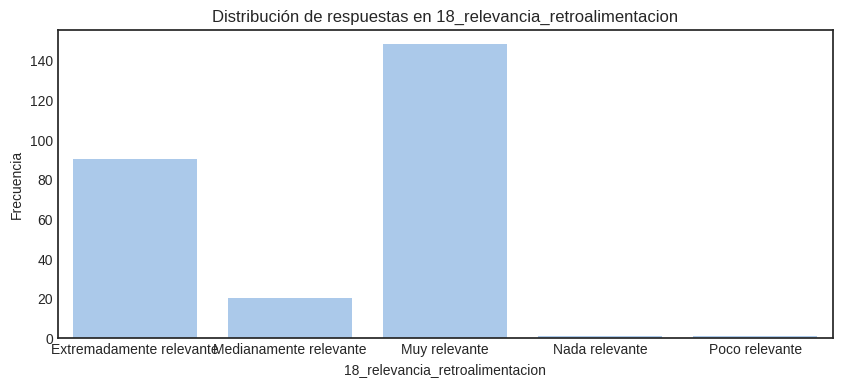

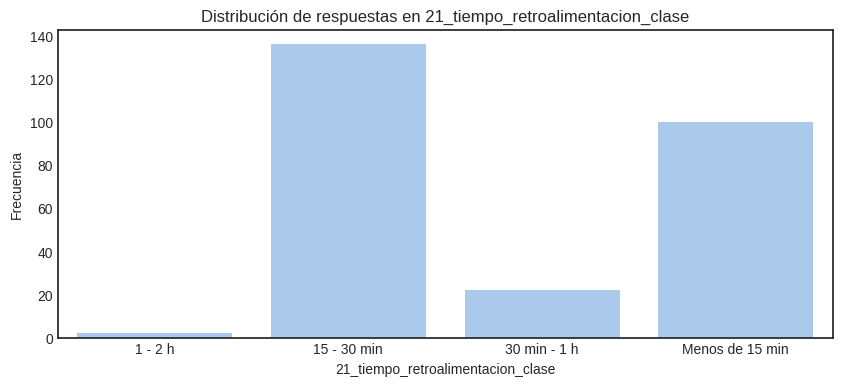

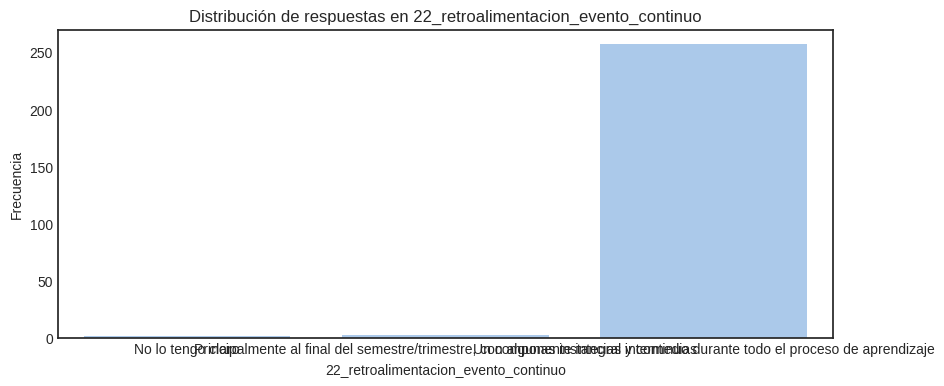

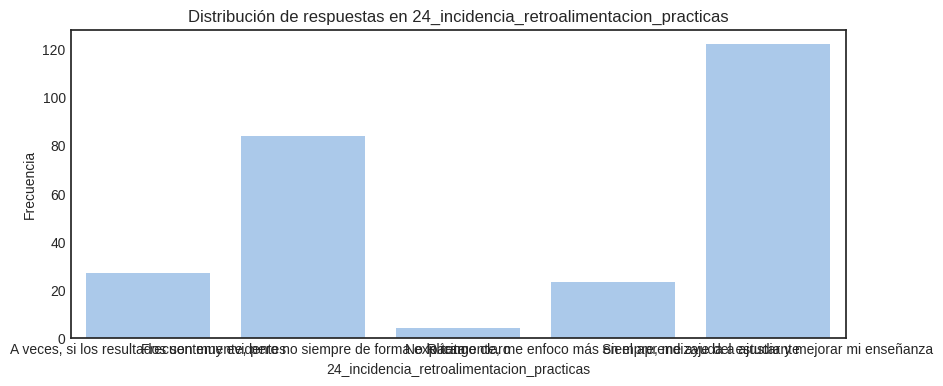

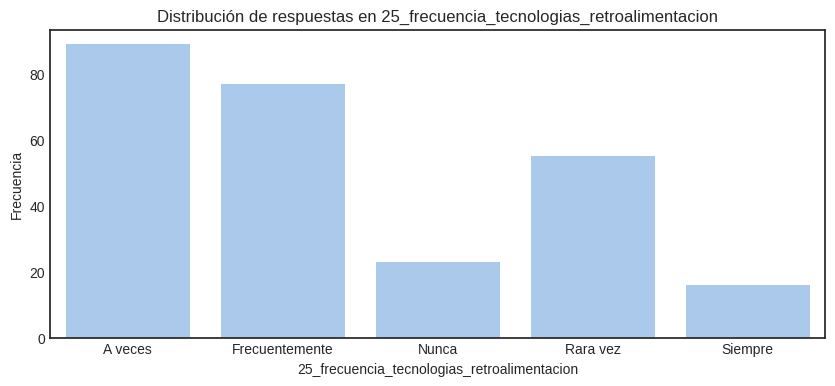

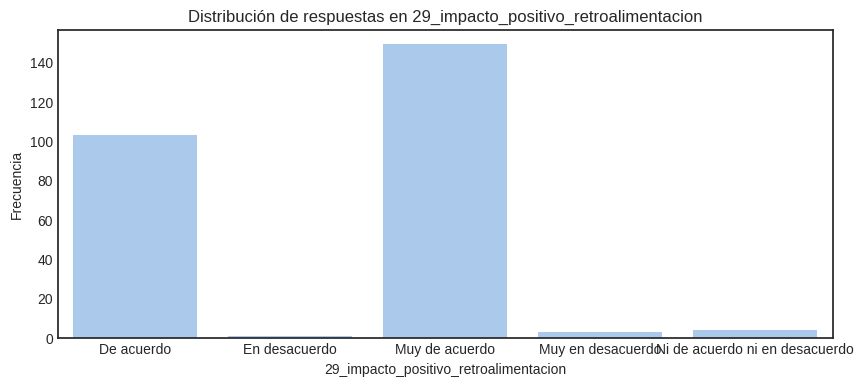

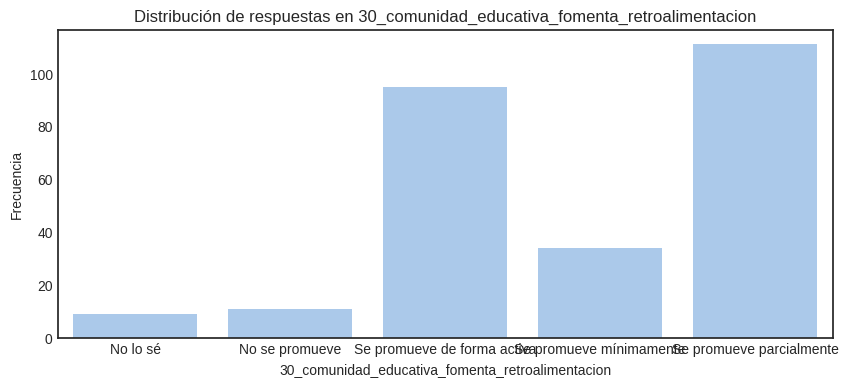

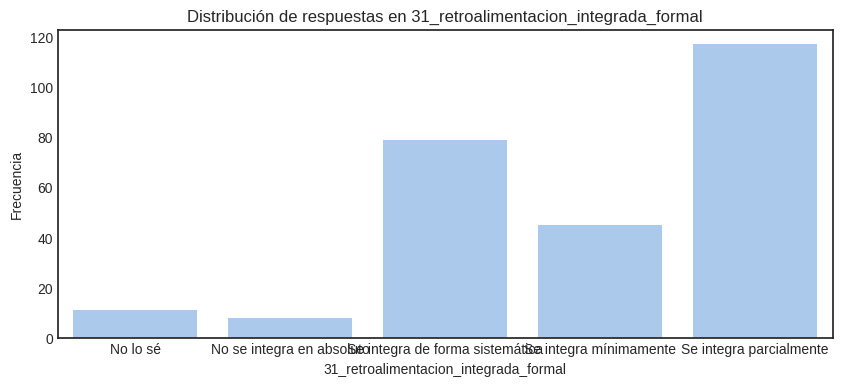

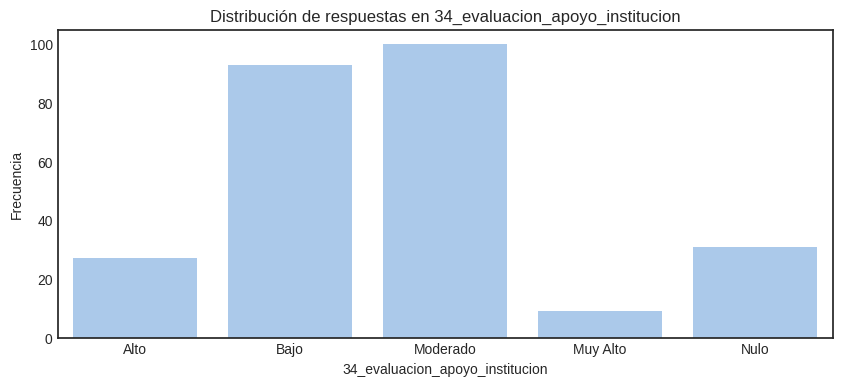

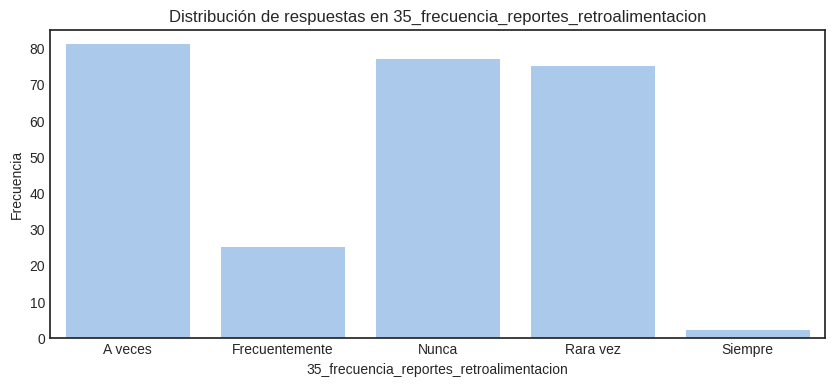

In [7]:
for col in ordinal_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=sorted(df[col].dropna().unique()))
        plt.title(f'Distribución de respuestas en {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

## Columnas Categóricas

In [8]:
# Columnas categóricas
categorical_cols = [
    '1_genero',
    '3_nombre_comunidad_educativa',
    '5_tipo_establecimiento',
    '6_tramo_carrera_docente',
    '7_region_trabajo',
    '8_niveles_educativos',
    '9_modalidad_educacion',
    '10_asignatura_principal',
    '11_años_experiencia_docente',
    '13_promedio_estudiantes_curso',
    '14_carrera_origen',
    '15_realiza_retroalimentacion'
]


In [9]:
categorical_cols


['1_genero',
 '3_nombre_comunidad_educativa',
 '5_tipo_establecimiento',
 '6_tramo_carrera_docente',
 '7_region_trabajo',
 '8_niveles_educativos',
 '9_modalidad_educacion',
 '10_asignatura_principal',
 '11_años_experiencia_docente',
 '13_promedio_estudiantes_curso',
 '14_carrera_origen',
 '15_realiza_retroalimentacion']

### Gráficos para visualizar la distribución de cada variable categórica individualmente.

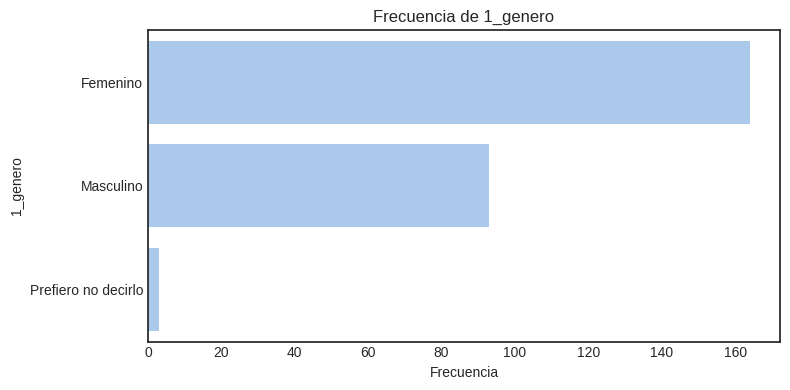

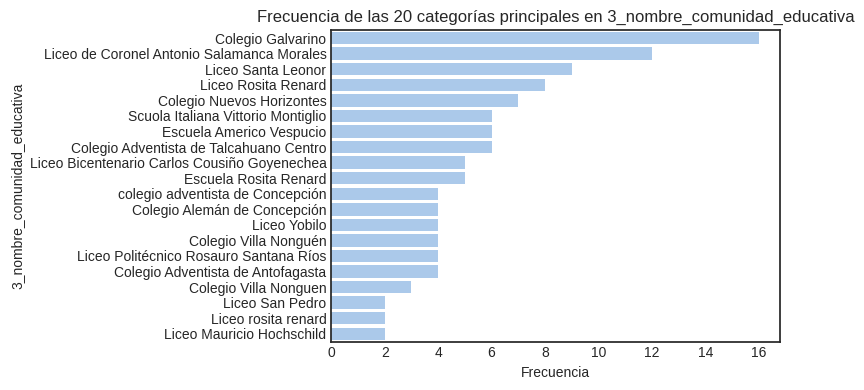

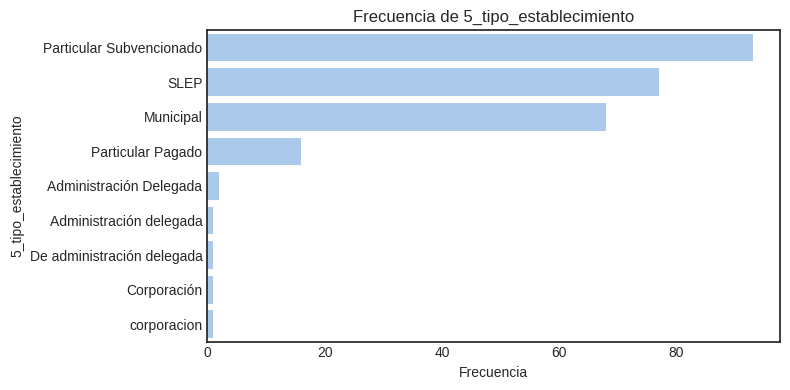

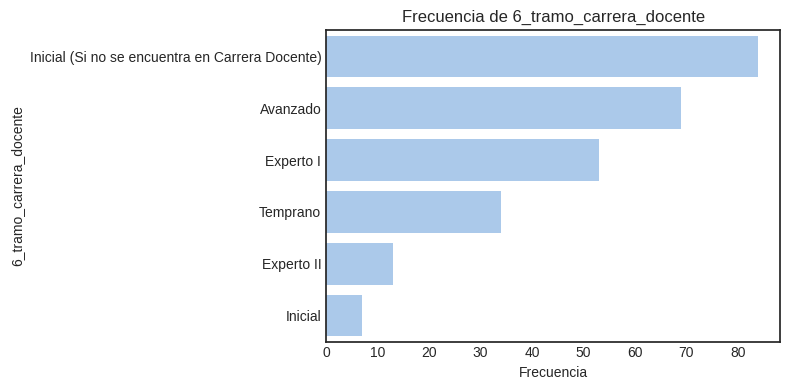

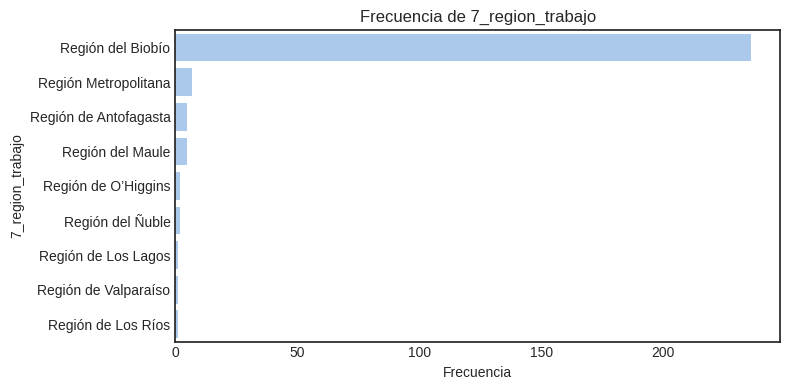

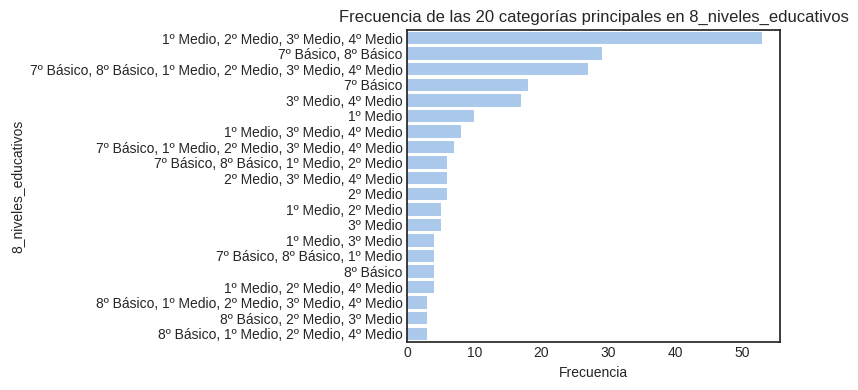

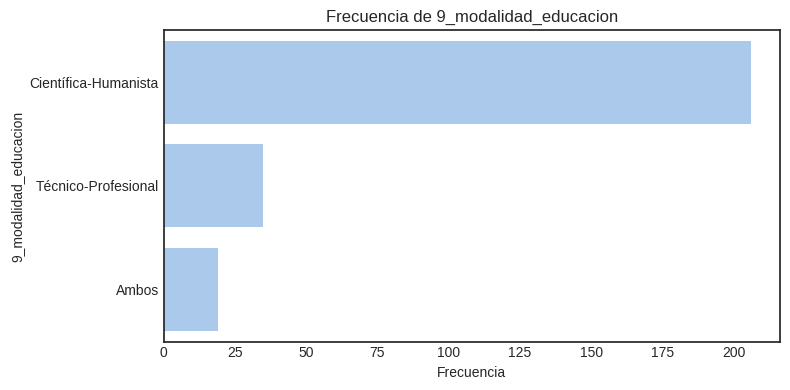

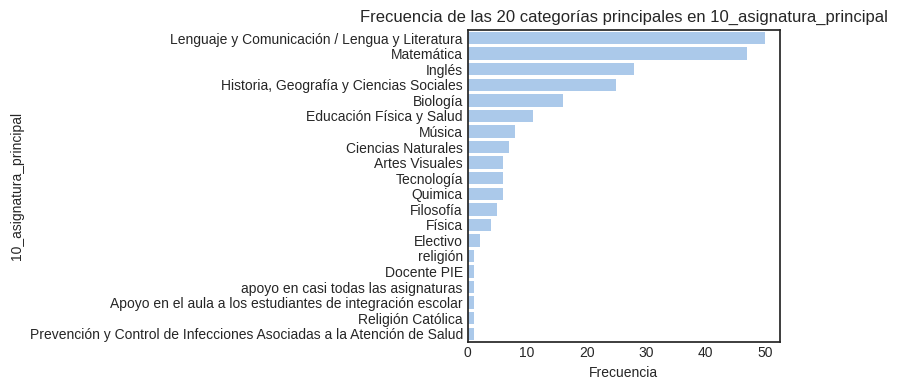

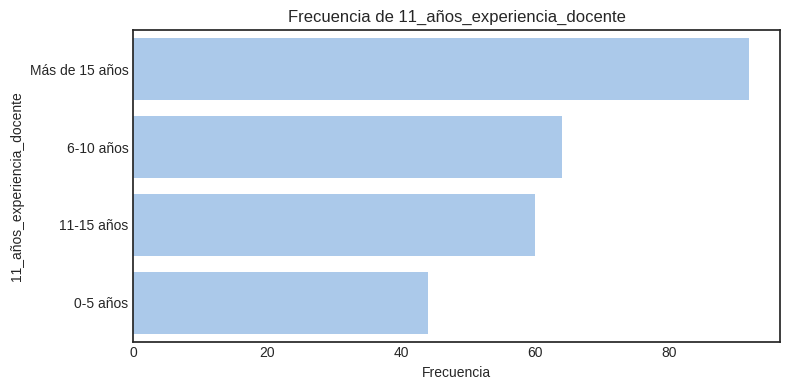

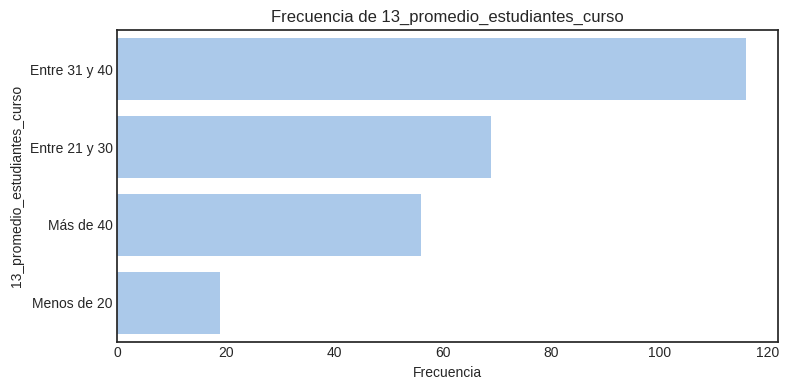

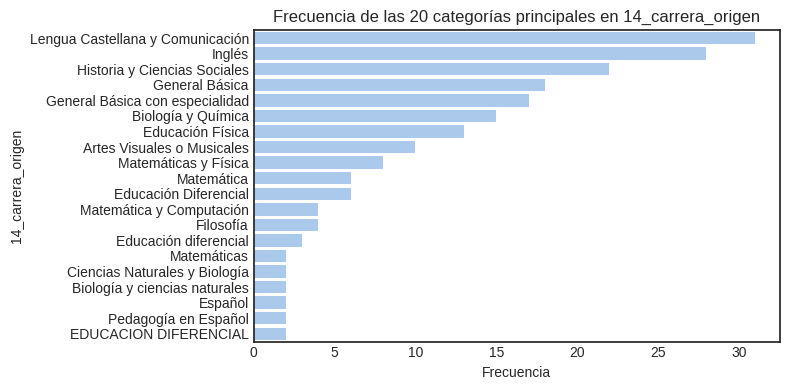

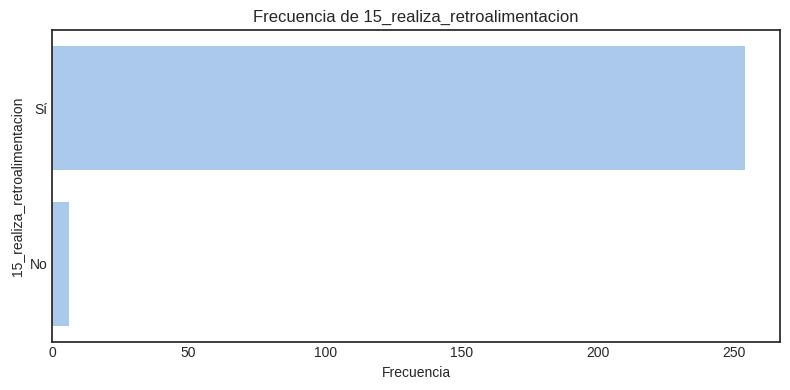

In [10]:
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        if df[col].nunique() > 20:
            top_categories = df[col].value_counts().nlargest(20).index
            sns.countplot(data=df[df[col].isin(top_categories)], y=col, order=top_categories)
            plt.title(f'Frecuencia de las 20 categorías principales en {col}')
        else:
            sns.countplot(data=df, y=col, order=df[col].value_counts().index)
            plt.title(f'Frecuencia de {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

## Definir Mapeos

Para cada columna ordinal identificada, se define un mapeo de las respuestas de texto a valores numéricos.


In [11]:
ordinal_mappings = {
    '16_nivel_formacion_retroalimentacion': {
        'No conozco el concepto': 0,
        'Lo conozco, pero no he recibido formación': 1,
        'He aprendido de forma autódidacta o informal': 2,
        'He participado en talleres o cursos breves': 3,
        'He recibido formación especializada (diplomado, posgrado)': 4,
    },
    '18_relevancia_retroalimentacion': {
        'Nada relevante': 0,
        'Poco relevante': 1,
        'Medianamente relevante': 2,
        'Muy relevante': 3,
        'Extremadamente relevante': 4,
    },
     '21_tiempo_retroalimentacion_clase': {
        'Menos de 15 min': 0,
        '15 - 30 min': 1,
        '30 min - 1 h': 2,
        '1 - 2 h': 3,
        '+ 2 h': 4,
    },
     '22_retroalimentacion_evento_continuo': {
        'Un evento aislado al finalizar una tarea':2,
        'Un componente integral y continuo durante todo el proceso de aprendizaje': 4,
        'Principalmente al final del semestre/trimestre, con algunas instancias intermedias': 3,
        'Solo cuando se solicita específicamente':1,
        'No lo tengo claro': 0,
    },
    '24_incidencia_retroalimentacion_practicas': {
        'No lo tengo claro': 0,
        'Raramente, me enfoco más en el aprendizaje del estudiante': 1,
        'A veces, si los resultados son muy evidentes': 2,
        'Frecuentemente, pero no siempre de forma explícita': 3,
        'Siempre, me ayuda a ajustar y mejorar mi enseñanza': 4,
    },
    '25_frecuencia_tecnologias_retroalimentacion': {
        'Nunca': 0,
        'Rara vez': 1,
        'A veces': 2,
        'Frecuentemente': 3,
        'Siempre': 4,
    },
    '29_impacto_positivo_retroalimentacion': {
        'Muy en desacuerdo': 0,
        'En desacuerdo': 1,
        'Ni de acuerdo ni en desacuerdo': 2,
        'De acuerdo': 3,
        'Muy de acuerdo': 4,
    },
    '32_frecuencia_mejoras_aprendizaje': {
        'Nunca hago retroalimentación': 0,
        'Nunca': 0,
        'Rara vez': 1,
        'A veces': 2,
        'Frecuentemente': 3,
        'Siempre': 4,
    }
}

##Aplicar Mapeos

In [12]:
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"Column '{col}' has been mapped.")

Column '16_nivel_formacion_retroalimentacion' has been mapped.
Column '18_relevancia_retroalimentacion' has been mapped.
Column '21_tiempo_retroalimentacion_clase' has been mapped.
Column '22_retroalimentacion_evento_continuo' has been mapped.
Column '24_incidencia_retroalimentacion_practicas' has been mapped.
Column '25_frecuencia_tecnologias_retroalimentacion' has been mapped.
Column '29_impacto_positivo_retroalimentacion' has been mapped.
Column '32_frecuencia_mejoras_aprendizaje' has been mapped.


##Verificar Conversión

In [13]:
mapped_columns = list(ordinal_mappings.keys())
display(df[mapped_columns].head())

print("\nTipos de datos de las columnas asignadas:")
print(df[mapped_columns].dtypes)

,16_nivel_formacion_retroalimentacion,18_relevancia_retroalimentacion,21_tiempo_retroalimentacion_clase,22_retroalimentacion_evento_continuo,24_incidencia_retroalimentacion_practicas,25_frecuencia_tecnologias_retroalimentacion,29_impacto_positivo_retroalimentacion,32_frecuencia_mejoras_aprendizaje
0,4,3,1,4,4,1,4,3
1,2,2,1,4,3,1,3,3
2,2,3,1,4,3,3,4,3
3,4,4,0,4,3,0,3,2
4,2,1,1,4,2,1,3,3



Tipos de datos de las columnas asignadas:
16_nivel_formacion_retroalimentacion           int64
18_relevancia_retroalimentacion                int64
21_tiempo_retroalimentacion_clase              int64
22_retroalimentacion_evento_continuo           int64
24_incidencia_retroalimentacion_practicas      int64
25_frecuencia_tecnologias_retroalimentacion    int64
29_impacto_positivo_retroalimentacion          int64
32_frecuencia_mejoras_aprendizaje              int64
dtype: object


##Identificar Columnas de Selección Múltiple

In [14]:
multiselect_cols = [
    '17_concepto_retroalimentacion',
    '19_momento_entrega_retroalimentacion',
    '20_tecnicas_retroalimentacion',
    '23_enfoques_retroalimentacion',
    '26_herramientas_tecnologicas'
]

print("Columnas de selección múltiple identificadas:")
print(multiselect_cols)

Columnas de selección múltiple identificadas:
['17_concepto_retroalimentacion', '19_momento_entrega_retroalimentacion', '20_tecnicas_retroalimentacion', '23_enfoques_retroalimentacion', '26_herramientas_tecnologicas']


##Verificar valores no nulos

In [15]:
import pandas as pd

# Forzar a pandas a mostrar TODAS las columnas y filas
pd.set_option('display.max_columns', None)   # Muestra todas las columnas
pd.set_option('display.max_rows', None)      # Muestra todas las filas (cuidado si son miles)
pd.set_option('display.width', None)         # Evita el salto de línea
pd.set_option('display.expand_frame_repr', False)  # No envuelve la tabla

print("\n--- Cantidad de respuestas no nulas por pregunta (todas las columnas) ---")
display(df.count().to_frame(name='Número de Respuestas'))



--- Cantidad de respuestas no nulas por pregunta (todas las columnas) ---


,Número de Respuestas
marca_temporal,260
acepto_participar,260
1_genero,260
2_edad,260
3_nombre_comunidad_educativa,260
4_rbd_establecimiento,260
5_tipo_establecimiento,260
6_tramo_carrera_docente,260
7_region_trabajo,260
8_niveles_educativos,260


In [18]:
df_preprocesado_final = df.copy()
df_variables_mapeadas = df[mapped_columns].copy()

# Guardar el dataframe preprocesado_final
preprocesado_final.to_csv('/content/drive/MyDrive/df_preprocesado_final', index=False)
print("DataFrame 'df_preprocesado_final.csv' guardado exitosamente en Google Drive.")

# Guardar el dataframe con solo las columnas mapeadas ordinales
df_mapped_ordinal.to_csv('/content/drive/MyDrive/df_variables_mapeadas.csv', index=False)
print("DataFrame 'df_variables_mapeadas.csv' guardado exitosamente en Google Drive.")

DataFrame 'df_preprocesado_final.csv' guardado exitosamente en Google Drive.
DataFrame 'df_variables_mapeadas.csv' guardado exitosamente en Google Drive.
